## Tarefas de classificação na base de dados do ENEM.

##### Alunos:
- Gabriel Fonseca (2111066)
- Yasmim Santos (2116925)
- Alejandro Elias (2111189)
- Pedro Lucas (2111131)

Base de dados escolhida - Exame Nacional do Ensino Médio (Enem): https://basedosdados.org/dataset/3e9c8804-c31c-4f48-9a45-d67f1c21a859

### Importando as dependências:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### Lendo e visualizando os dados:

In [8]:
df_enem = pd.read_csv(
    f"../../data/out/enem-dados-tratados.csv",
    dtype={
        "id_inscricao": np.int64,
        "ensino": int,
        "nota_ciencias_natureza": float,
        "nota_ciencias_humanas": float,
        "nota_linguagens_codigos": float,
        "nota_matematica": float,
        "nota_redacao": float,
        "q_formacao_pai": str,
        "q_formacao_mae": str,
        "q_renda_familia": str,
    },
)

df_enem

,id_inscricao,ensino,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,nota_redacao,q_formacao_pai,q_formacao_mae,q_renda_familia,ano
0,150001892848,3,366.8,436.9,374.2,331.4,380.0,B,A,C,2015
1,150002421428,1,512.0,636.9,552.0,549.2,760.0,A,A,C,2015
2,150004396764,1,470.8,519.3,465.2,350.8,580.0,B,A,B,2015
3,150001657786,1,492.6,641.2,553.2,649.5,840.0,A,A,A,2015
4,150005415838,1,473.3,533.4,443.3,447.4,400.0,A,A,A,2015
...,...,...,...,...,...,...,...,...,...,...,...
357268,210054596750,1,450.6,403.1,443.3,479.8,0.0,E,E,B,2022
357269,210056286560,1,416.5,427.3,484.6,376.2,0.0,D,D,A,2022
357270,210057495281,1,462.1,421.7,432.1,530.9,0.0,C,D,B,2022
357271,210056812211,1,519.1,570.4,537.3,388.7,0.0,D,H,B,2022


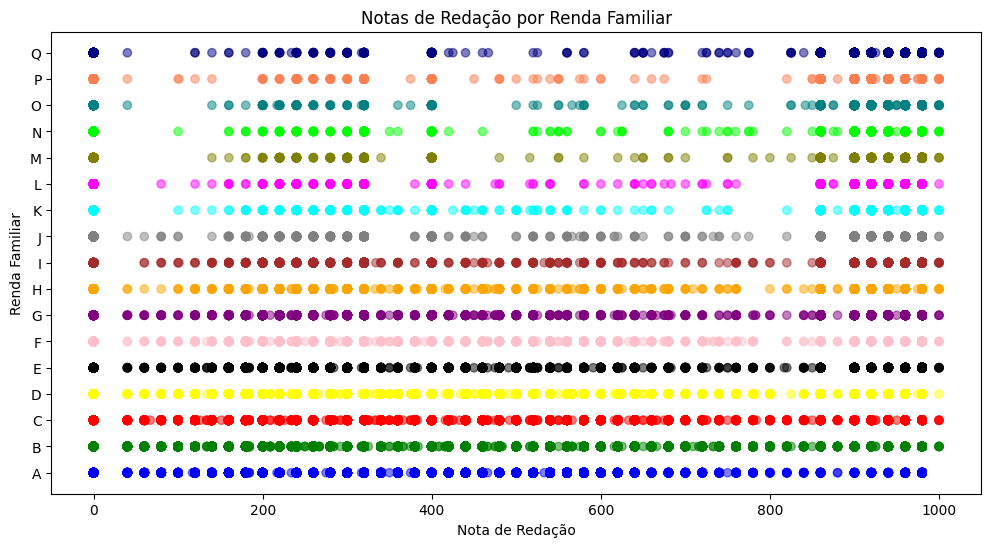

In [9]:
dict_renda_para_cor = {
    "A": "blue",
    "B": "green",
    "C": "red",
    "D": "yellow",
    "E": "black",
    "F": "pink",
    "G": "purple",
    "H": "orange",
    "I": "brown",
    "J": "gray",
    "K": "cyan",
    "L": "magenta",
    "M": "olive",
    "N": "lime",
    "O": "teal",
    "P": "coral",
    "Q": "navy",
}

dict_renda_para_ordem = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5,
    "F": 6,
    "G": 7,
    "H": 8,
    "I": 9,
    "J": 10,
    "K": 11,
    "L": 12,
    "M": 13,
    "N": 14,
    "O": 15,
    "P": 16,
    "Q": 17,
}

df_enem["q_renda_familia_cor"] = df_enem["q_renda_familia"].map(dict_renda_para_cor)
df_enem["q_renda_familia_ordem"] = df_enem["q_renda_familia"].map(dict_renda_para_ordem)

plt.figure(figsize=(12, 6))
plt.scatter(
    df_enem["nota_redacao"],
    df_enem["q_renda_familia_ordem"],
    c=df_enem["q_renda_familia_cor"],
    alpha=0.5,
)
plt.yticks(list(dict_renda_para_ordem.values()), list(dict_renda_para_ordem.keys()))
plt.xlabel("Nota de Redação")
plt.ylabel("Renda Familiar")
plt.title("Notas de Redação por Renda Familiar")
plt.show()

### Preparando os dados para utilização no modelo:

In [10]:
features = [
    "nota_redacao",
]

# df_enem = df_enem.drop(df_enem[df_enem["nota_redacao"] == 0].index)

df_enem[features] = StandardScaler().fit_transform(df_enem[features])

X = np.array(df_enem[features])
Y = np.array(df_enem["q_renda_familia"])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, random_state=5487
)

X_train: np.ndarray = X_train
Y_train: np.ndarray = Y_train
X_test: np.ndarray = X_test
Y_test: np.ndarray = Y_test

pd.DataFrame(X_train).head()

,0
0,-0.755808
1,-0.755808
2,1.001611
3,-0.755808
4,-0.755808


### Realizando a classificação:

In [11]:
model = KNeighborsClassifier(n_neighbors=30, weights="distance")
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)

pd.DataFrame({"Acurácia classificação": [f"{result:.2%}"]})

,Acurácia classificação
0,39.85%
